# Predicting Total Mechanical Strain in a FE Model with Non-linear material properties

A Rod of below dimensions and material properties is put under static force and strains are noted for each force.
For a non-linear material model - the component will show elastic strain and plastic strain.
Total mechanical strain = Elastic Strain + Plastic Strain
Polynomial Regression is used to fit the behaviour curve and predict a few values.
This can be used with testing results also to develop a stress-strain curve from testing (using universal testing machine, etc.)

Rod Dimensions: </br>
Diameter = 200 mm </br>
Length = 1000 mm </br>

Material Properties:</br>
Young's Modulus = 210000 N/mm^2</br>
Poisson's Ratio = 0.3</br>

The Stress-Strain Curve used as plotted below:

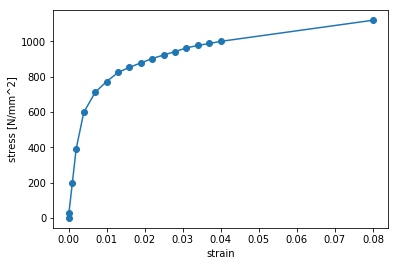

In [1]:
import pandas as pd
stress = pd.read_csv('stress.txt', header=None)
strain = pd.read_csv('strain.txt', header=None)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(strain[0],stress[0],"-o")
plt.xlabel("strain")
plt.ylabel("stress [N/mm^2]")
plt.show()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

%matplotlib inline

C:\Users\pushu\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
dataset = pd.read_csv('force_strain_NL.csv', header=None)

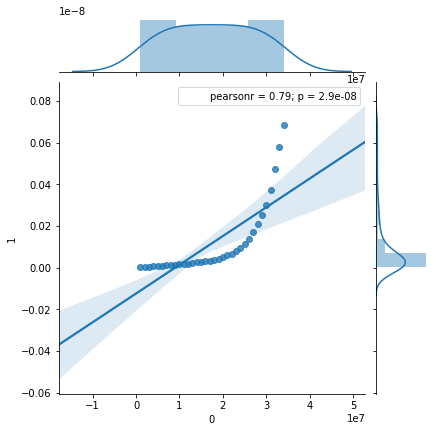

In [4]:
sns.jointplot(x=dataset[0], y=dataset[1], data=dataset, kind='reg')

In [5]:
#Splitting the dataset to training set and test set
x_train, x_test, y_train, y_test = train_test_split(dataset[0],dataset[1], test_size = 1/3, random_state=0)
x_train = np.reshape(x_train, (-1,1))
x_test = np.reshape(x_test, (-1,1))
y_train = np.reshape(y_train, (-1,1))
y_test = np.reshape(y_test, (-1,1))

x_test_ls = np.linspace(-1e7,4e7,1e6)

x_test_ls = np.reshape(x_test_ls, (-1,1))



print('Train - Predictors shape', x_train.shape)
print('Test - Predictors shape', x_test.shape)
print('Train - Target shape', y_train.shape)
print('Test - Target shape', x_test.shape)

Train - Predictors shape (22, 1)
Test - Predictors shape (12, 1)
Train - Target shape (22, 1)
Test - Target shape (12, 1)


C:\Users\pushu\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)
C:\Users\pushu\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


In [6]:
poly = PolynomialFeatures(degree=8)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.fit_transform(x_test)
x_test_ls_poly = poly.fit_transform(x_test_ls)

In [7]:
regressor = LinearRegression()
regressor.fit(x_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
y_predict_ls = regressor.predict(x_test_ls_poly)

In [9]:
y_predict = regressor.predict(x_test_poly)

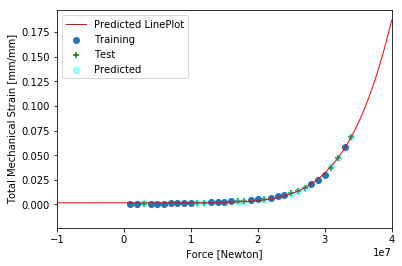

In [10]:
plt.scatter(x_train,y_train,label="Training")
plt.scatter(x_test, y_test, marker='+', color='green',label="Test")
plt.scatter(x_test, y_predict, color='cyan', alpha = 0.4,label = "Predicted")
plt.plot(x_test_ls, y_predict_ls, color='red', linewidth = 1, label = "Predicted LinePlot")
plt.xlabel("Force [Newton]")
plt.ylabel("Total Mechanical Strain [mm/mm]")
plt.xlim(-1e7,4e7)
plt.legend()
plt.show()

In [11]:
mean_squared_error(y_test,y_predict)

6.7588024252111941e-07

In [12]:
y_test

array([[ 0.00196297],
       [ 0.00592553],
       [ 0.01361979],
       [ 0.00378056],
       [ 0.00047963],
       [ 0.01703541],
       [ 0.0473708 ],
       [ 0.00347197],
       [ 0.00179663],
       [ 0.06874595],
       [ 0.03749518],
       [ 0.0114993 ]])

In [13]:
 y_predict

array([[ 0.00177226],
       [ 0.00459183],
       [ 0.01357598],
       [ 0.00273307],
       [ 0.00170687],
       [ 0.01690532],
       [ 0.04736855],
       [ 0.00240485],
       [ 0.00174291],
       [ 0.06890096],
       [ 0.03895167],
       [ 0.01087782]])